In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

Dataset: https://github.com/radhikascs/Recommendation-System

In [3]:
df = pd.read_csv('movies_metadata.csv', low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.shape

(45466, 24)

In [5]:
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


<AxesSubplot:>

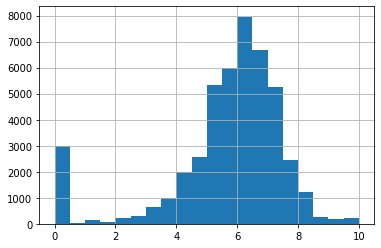

In [8]:
df['vote_average'].hist(bins=20)

<AxesSubplot:>

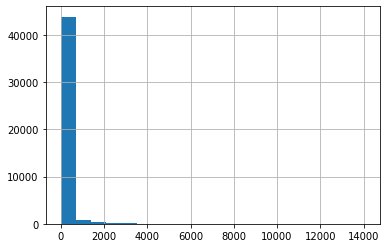

In [9]:
df['vote_count'].hist(bins=20)

<AxesSubplot:>

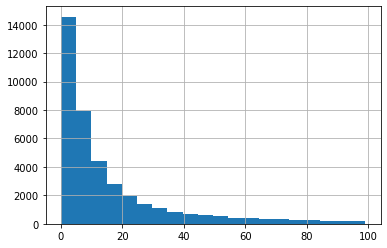

In [10]:
df[df['vote_count'] < 100]['vote_count'].hist(bins=20)

<AxesSubplot:xlabel='vote_average'>

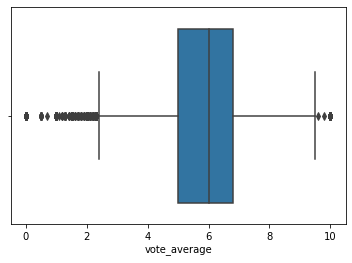

In [11]:
sns.boxplot(df['vote_average'])

<AxesSubplot:xlabel='vote_count'>

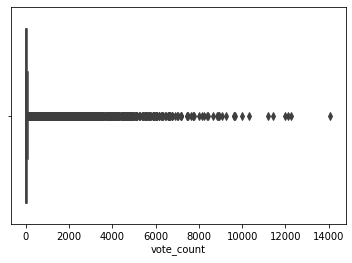

In [12]:
sns.boxplot(df['vote_count'])

## Build model

In [13]:
vote_average = df['vote_average'].mean()
vote_average

5.618207215133889

In [14]:
vote_count = df['vote_count'].quantile(0.9)
vote_count

160.0

In [15]:
# Only keeping big hits
df_ = df[
    (df['runtime']>150)
    &(df['revenue']>30000000)
    &(df['homepage'].notna())
    &(df['vote_count']>vote_count)
]
df_.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,1993-11-29,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0
834,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",...,1972-03-14,2.450664e+08,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,False,8.5,6024.0
1165,False,NaN,31500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.apocalypsenow.com,28,tt0078788,en,Apocalypse Now,"At the height of the Vietnam war, Captain Benj...",...,1979-08-15,8.946038e+07,153.0,"[{'iso_639_1': 'km', 'name': ''}, {'iso_639_1'...",Released,This is the end...,Apocalypse Now,False,8.0,2112.0
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,1997-11-18,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0
1914,False,"{'id': 230, 'name': 'The Godfather Collection'...",54000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.imdb.com/title/tt0099674/,242,tt0099674,en,The Godfather: Part III,In the midst of trying to legitimize his busin...,...,1990-12-24,1.367661e+08,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,All the power on earth can't change destiny.,The Godfather: Part III,False,7.1,1589.0


In [16]:
df_.shape

(49, 24)

In [17]:
df_ = df_[['title','vote_count','vote_average']]
df_.head()

,title,vote_count,vote_average
522,Schindler's List,4436.0,8.3
834,The Godfather,6024.0,8.5
1165,Apocalypse Now,2112.0,8.0
1639,Titanic,7770.0,7.5
1914,The Godfather: Part III,1589.0,7.1


In [18]:
def wr(x, m=vote_count, c=vote_average):
    v = x['vote_count']
    r = x['vote_average']
    return (v/(v+m)*r)+(m/(m+v)*c)

df_['score'] = df_.apply(wr, axis=1)
df_.head()

,title,vote_count,vote_average,score
522,Schindler's List,4436.0,8.3,8.206639
834,The Godfather,6024.0,8.5,8.425439
1165,Apocalypse Now,2112.0,8.0,7.832268
1639,Titanic,7770.0,7.5,7.462032
1914,The Godfather: Part III,1589.0,7.1,6.964444


In [19]:
df_ = df_.sort_values('score', ascending=False)
df_

,title,vote_count,vote_average,score
834,The Godfather,6024.0,8.5,8.425439
12481,The Dark Knight,12269.0,8.3,8.265477
522,Schindler's List,4436.0,8.3,8.206639
3030,The Green Mile,4166.0,8.2,8.104511
22879,Interstellar,11187.0,8.1,8.065005
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,8.052649
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.957900
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.951149
22131,The Wolf of Wall Street,6768.0,7.9,7.847303
13605,Inglourious Basterds,6598.0,7.9,7.845977


Text(0.5, 1.0, 'Most voted Movies')

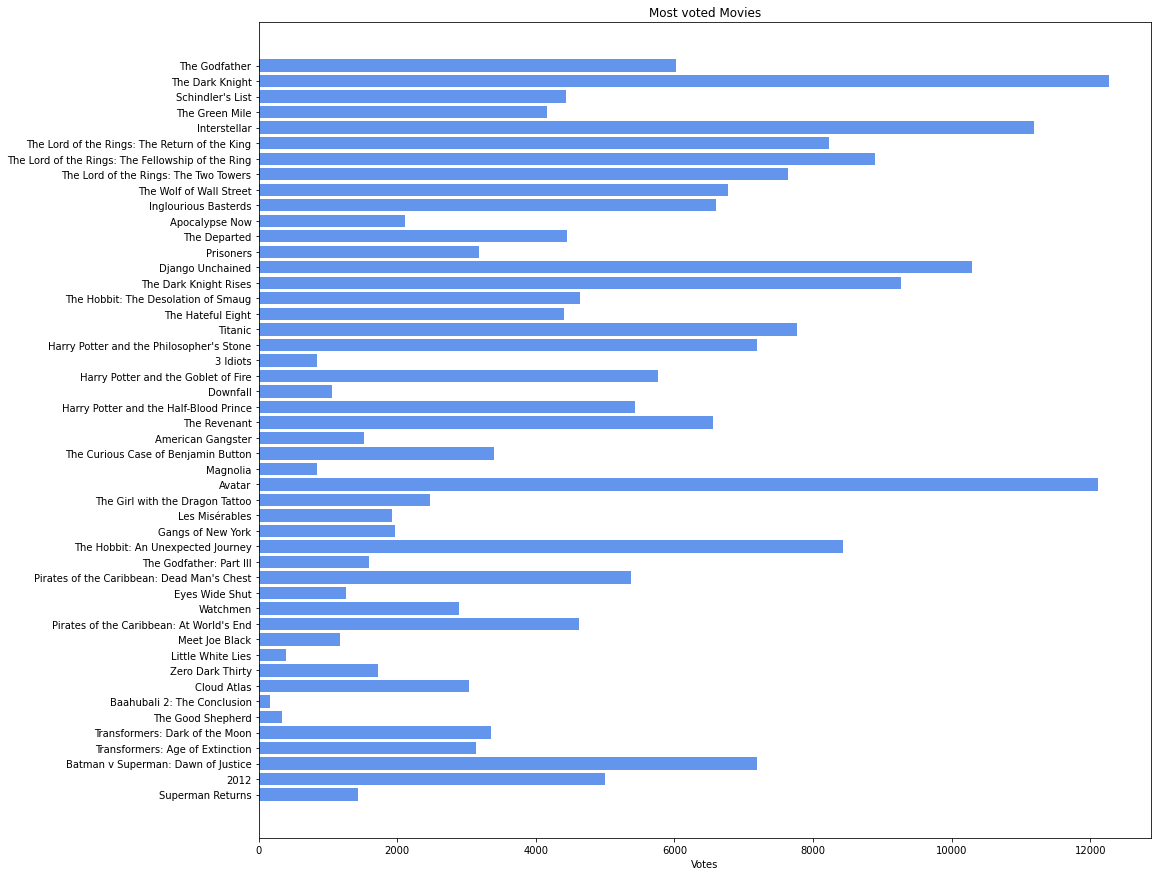

In [20]:
plt.figure(figsize=(16,15))
plt.barh(df_['title'], df_['vote_count'],
         align='center',
         color='cornflowerblue')

plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("Most voted Movies")